In [1]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from random import shuffle
from IPython.display import clear_output
from sklearn import metrics
import time
import seaborn as sns
from tqdm import tqdm
%matplotlib inline

In [2]:
BINDER = True

In [ ]:
from tqdm import tqdm_notebook

In [ ]:
%%time
import wget 
#wget.download('https://drive.google.com/a/phystech.edu/uc?id=1nBEBW_Yzm7WESYinyyF2OecbxiPKhMyT&export=download')
#!unzip data.zip
lpmt_hits = pd.read_hdf('train_lpmt_hits.csv')
lpmt_n_hits = pd.read_csv('train_lpmt_n_hits.csv')
spmt_hits = pd.read_hdf('train_spmt_hits.csv')
spmt_n_hits = pd.read_csv('train_spmt_n_hits.csv')
spmt_pos = pd.read_csv('spmt_pos.csv')
lpmt_pos = pd.read_csv('lpmt_pos.csv')
info = pd.read_csv('train_info.csv')

#### Large detectors, hits

In [5]:
print(lpmt_hits.head())
print(lpmt_hits.shape)

   event     hitTime   isDN  pmtID
0      0  249.992615  False  14175
1      0   40.010311  False  17319
2      0  162.123199  False  16882
3      0   51.875614  False  14951
4      0   79.817497  False  10947
(92717003, 4)


#### Small detectors, hits

In [6]:
print(spmt_hits.head())
print(spmt_hits.shape)

   event     hitTime   isDN   pmtID
0      0  238.278091  False  311819
1      0  103.316055  False  307244
2      0  108.034225  False  323230
3      0   36.505154  False  320568
4      0   34.109840  False  316487
(2314146, 4)


#### Small detectors, number of hits in event

In [7]:
print(spmt_n_hits.head())
print(spmt_n_hits.shape)

   event_id  nHits
0         0    212
1         1    191
2         3    162
3         4    180
4         5    310
(10000, 2)


#### Large detectors, number of hits in event

In [8]:
print(lpmt_n_hits.head())
print(lpmt_n_hits.shape)

   event_id  nHits
0         0   8902
1         1   7305
2         3   6718
3         4   5966
4         5  12744
(10000, 2)


#### Predictable events

In [9]:
print(info.head())
print(info.shape)

          E          R  evtID           x           y            z
0  4.747791  14610.378      0   8290.7790  11995.6180    911.74286
1  3.919721  14630.141      1  11397.6320   5407.4497  -7409.08200
2  3.765940  16820.080      3  -2377.9307 -16317.7020   3315.59030
3  3.217473  13026.938      4  -8617.1170    868.5116   9730.98600
4  7.360527  15190.775      5   4050.2210   9521.7620  11121.66500
(10000, 6)


#### Position of small detectors

In [10]:
print(spmt_pos.head())
print(spmt_pos.shape)

   pmt_id         pmt_x       pmt_y      pmt_z
0  300000  1.384810e+03   244.17944  19148.438
1  300001  1.217782e+03   703.08670  19148.438
2  300002  9.038709e+02  1077.19130  19148.438
3  300003  4.809396e+02  1321.37070  19148.438
4  300004  8.610328e-14  1406.17330  19148.438
(24952, 4)


#### Position of large detectors

In [10]:
print(lpmt_pos.head())
print(lpmt_pos.shape)

   pmt_id         pmt_x      pmt_y     pmt_z
0       0  1.049021e+03     0.0000  19171.32
1       1  9.084785e+02   524.5103  19171.32
2       2  5.245103e+02   908.4785  19171.32
3       3  6.423399e-14  1049.0206  19171.32
4       4 -5.245103e+02   908.4785  19171.32
(17739, 4)


In [11]:
event_id = 10000
lpmt_event_hits = lpmt_hits.loc[lpmt_hits['event'] == event_id]
spmt_event_hits = spmt_hits.loc[spmt_hits['event'] == event_id]

In [12]:
lpmt_hits_values = lpmt_event_hits['pmtID'].values
spmt_hits_values = spmt_event_hits['pmtID'].values

In [15]:
spmt_n_hits.rename(index = str, columns = {"event_id": "event"}, inplace = True)
lpmt_n_hits.rename(index = str, columns = {"event_id": "event"}, inplace = True)

In [14]:
info.rename(index = str, columns = {"evtID": "event"}, inplace = True)

In [16]:
spmt_n_hits.head()

,event,nHits
0,0,212
1,1,191
2,3,162
3,4,180
4,5,310


In [17]:
%%time
spmt_pos.rename(index = str, columns = {"pmt_id": "pmtID"}, inplace = True)
lpmt_pos.rename(index = str, columns = {"pmt_id": "pmtID"}, inplace = True)

Wall time: 116 ms


In [18]:
%%time
lpmt_hits['isDN'] = lpmt_hits.isDN.apply(lambda x: 0 if x == False else 1)
spmt_hits['isDN'] = spmt_hits.isDN.apply(lambda x: 0 if x == False else 1)

Wall time: 1min 48s


In [28]:
#lpmt_hits.drop(columns = 'is_DN', inplace = True)
#spmt_hits.drop(columns = 'is_DN', inplace = True)

In [20]:
spmt_hits.head()

,event,hitTime,isDN,pmtID
0,0,238.278091,0,311819
1,0,103.316055,0,307244
2,0,108.034225,0,323230
3,0,36.505154,0,320568
4,0,34.109840,0,316487


In [21]:
lpmt_pos.head()

,pmtID,pmt_x,pmt_y,pmt_z
0,0,1.049021e+03,0.0000,19171.32
1,1,9.084785e+02,524.5103,19171.32
2,2,5.245103e+02,908.4785,19171.32
3,3,6.423399e-14,1049.0206,19171.32
4,4,-5.245103e+02,908.4785,19171.32


#### Делаю небольшой срез массива хитов, чтобы при мёрдже не завис

In [61]:
lpmt_hits_small = lpmt_hits[:2000000]
print(lpmt_hits.shape)
print(lpmt_hits_small.shape)

(92717003, 4)
(2000000, 4)


In [62]:
pmt = pd.merge(lpmt_hits_small,lpmt_n_hits, how = 'inner', on = 'event')

In [63]:
print(lpmt_hits_small.head())
print(lpmt_n_hits.head())

   event     hitTime  isDN  pmtID
0      0  249.992615     0  14175
1      0   40.010311     0  17319
2      0  162.123199     0  16882
3      0   51.875614     0  14951
4      0   79.817497     0  10947
   event  nHits
0      0   8902
1      1   7305
2      3   6718
3      4   5966
4      5  12744


In [64]:
print(pmt.head())
print(pmt.shape)

   event     hitTime  isDN  pmtID  nHits
0      0  249.992615     0  14175   8902
1      0   40.010311     0  17319   8902
2      0  162.123199     0  16882   8902
3      0   51.875614     0  14951   8902
4      0   79.817497     0  10947   8902
(2000000, 5)


In [65]:
lpmt = pd.merge(pmt, lpmt_pos, on = 'pmtID', how = 'inner')

In [66]:
print(lpmt.head())
print(lpmt.shape)

   event     hitTime  isDN  pmtID  nHits     pmt_x      pmt_y      pmt_z
0      0  249.992615     0  14175   8902 -5411.832  16838.455 -7471.1797
1      0   92.820419     0  14175   8902 -5411.832  16838.455 -7471.1797
2      5  225.598312     0  14175  12744 -5411.832  16838.455 -7471.1797
3      5  -99.477516     1  14175  12744 -5411.832  16838.455 -7471.1797
4     22  311.370026     0  14175  12466 -5411.832  16838.455 -7471.1797
(2000000, 8)


In [ ]:
# Не запускать, виснет!
#pmt = pd.merge(lpmt_hits,lpmt_n_hits, how = 'inner', on = 'event')
#lpmt = pd.merge(pmt, lpmt_pos, on = 'pmtID', how = 'inner')

#### Рассмотрю данные в маленьких детекторах, потому что там их меньше

In [38]:
spmt = pd.merge(spmt_hits,spmt_n_hits, how = 'inner', on = 'event')
print(spmt.head())

   event     hitTime  isDN   pmtID  nHits
0      0  238.278091     0  311819    212
1      0  103.316055     0  307244    212
2      0  108.034225     0  323230    212
3      0   36.505154     0  320568    212
4      0   34.109840     0  316487    212


In [39]:
spmtPos = pd.merge(spmt, spmt_pos, on = 'pmtID', how = 'inner')
print(spmtPos.head())
print(spmtPos.shape)

   event     hitTime  isDN   pmtID  nHits      pmt_x      pmt_y      pmt_z
0      0  238.278091     0  311819    212  1320.0306 -17951.344  6681.8247
1     73  108.962761     0  311819    362  1320.0306 -17951.344  6681.8247
2    232   97.140427     0  311819    429  1320.0306 -17951.344  6681.8247
3    689  143.792679     0  311819    184  1320.0306 -17951.344  6681.8247
4    723  104.973770     0  311819    300  1320.0306 -17951.344  6681.8247
(2314146, 8)


In [44]:
spmtDN = spmt.groupby(by = 'event', as_index = False)['isDN'].mean()
print(spmtDN.head())

   event      isDN
0      0  0.042453
1      1  0.047120
2      3  0.129630
3      4  0.127778
4      5  0.048387


#### Plotting distribution mean amount of events by Dark Noise 

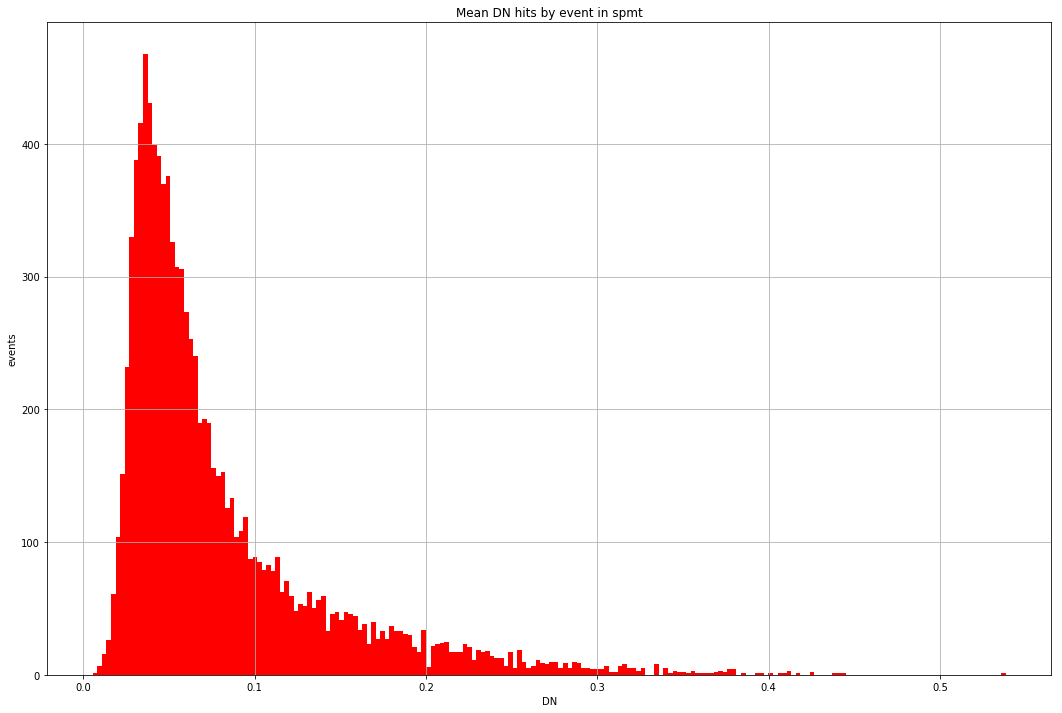

In [50]:
figSize = (18, 12)
plt.figure(figsize = figSize)
plt.grid('on')
plt.hist(spmtDN['isDN'], bins = 200, color = 'r')
plt.xlabel('DN')
plt.ylabel('events')
plt.title('Mean DN hits by event in spmt')
plt.show()

#### Распределение шума в хитах, регистрируемых на больших детекторах - срезка

In [67]:
lpmtDN = lpmt.groupby(by = 'event', as_index = False)['isDN'].mean()
print(lpmtDN.head())

   event      isDN
0      0  0.082453
1      1  0.105544
2      3  0.102263
3      4  0.117332
4      5  0.056890


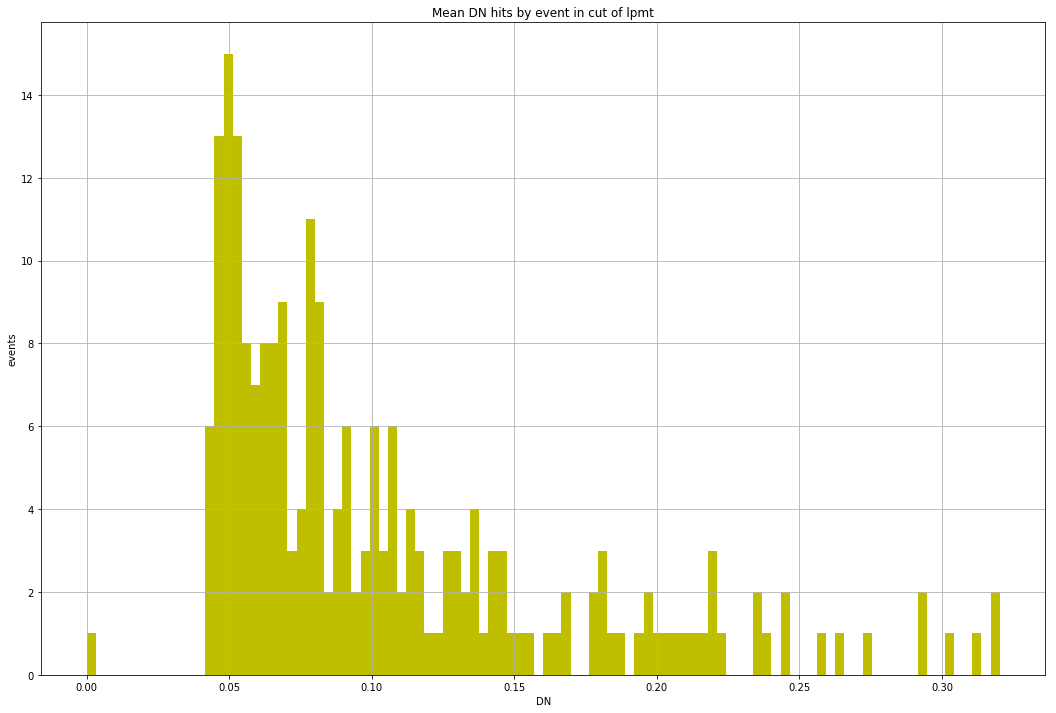

In [75]:
figSize = (18, 12)
plt.figure(figsize = figSize)
plt.grid('on')
plt.hist(lpmtDN['isDN'], bins = 100, color = 'y')
plt.xlabel('DN')
plt.ylabel('events')
plt.title('Mean DN hits by event in cut of lpmt')
plt.show()

#### Распределение шума по маленьким ФЭУ

In [71]:
spmtPMT = spmt.groupby(by = 'pmtID', as_index = False)['isDN'].mean()
print(spmtPMT.head())

    pmtID      isDN
0  300000  0.050505
1  300001  0.084337
2  300002  0.031579
3  300003  0.026316
4  300004  0.044118


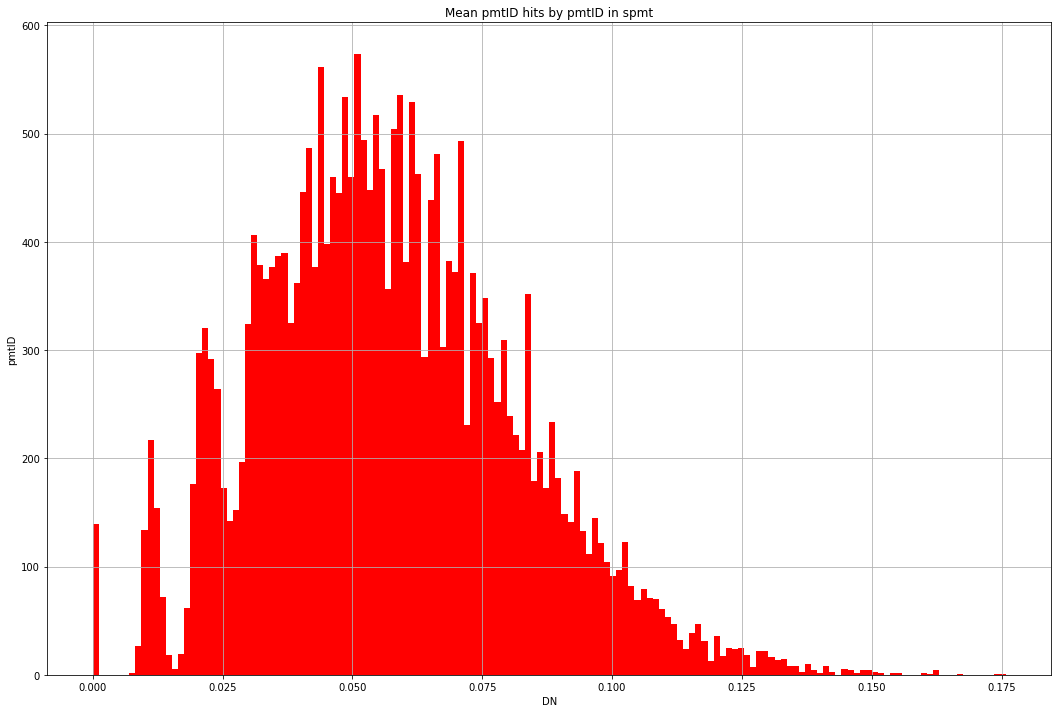

In [79]:
figSize = (18, 12)
plt.figure(figsize = figSize)
plt.grid('on')
plt.hist(spmtPMT['isDN'], bins = 150, color = 'r')
plt.xlabel('DN')
plt.ylabel('pmtID')
plt.title('Mean pmtID hits by pmtID in spmt')
plt.show()

In [94]:
spmtDN['is_DN'] = spmtDN.isDN.apply(lambda x: round(x, 2))
spmtPMT['is_DN'] = spmtPMT.isDN.apply(lambda x: round(x, 2))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 <a list of 44 Text xticklabel objects>)

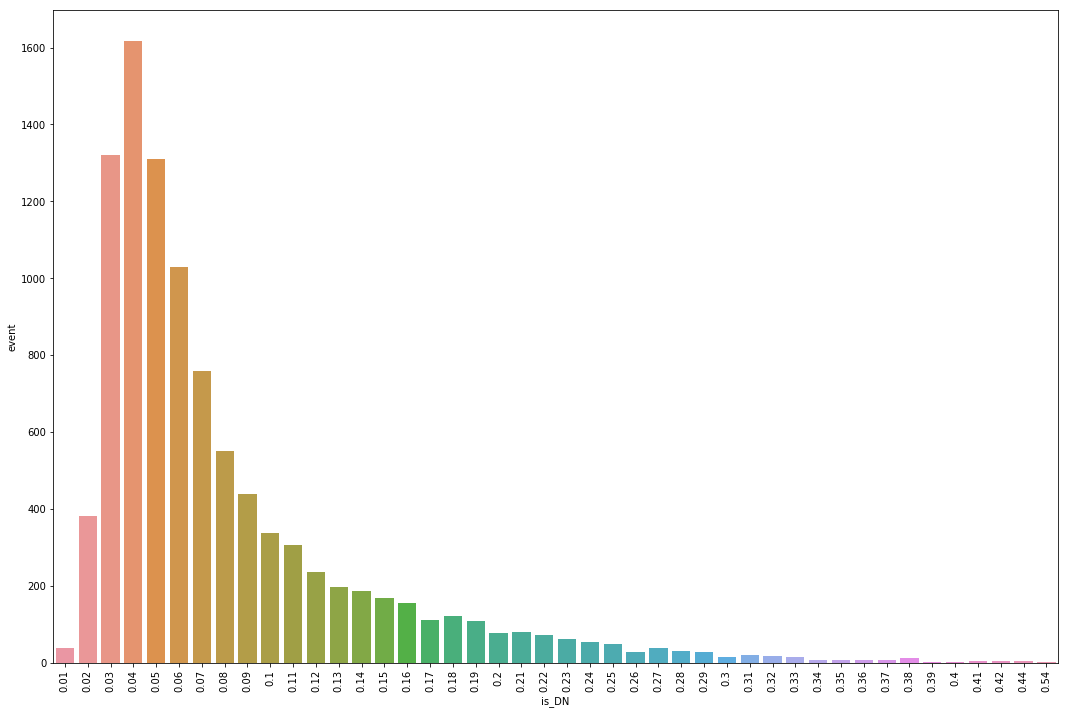

In [91]:
plt.figure(figsize = figSize)
sns.barplot(x = "is_DN", y = "event", data = spmtDN.groupby('is_DN', as_index = False)['event'].count())
plt.xticks(rotation = 'vertical')
#plt.xticks(x, labels, rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

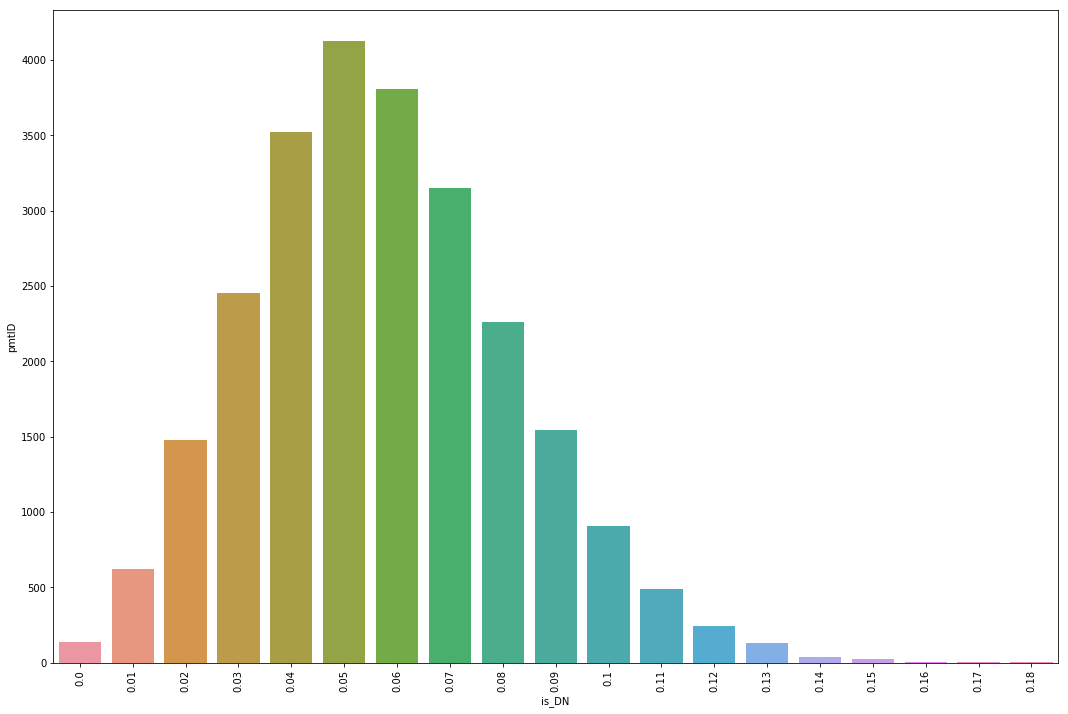

In [95]:
plt.figure(figsize = figSize)
sns.barplot(x = "is_DN", y = "pmtID", data = spmtPMT.groupby('is_DN', as_index = False)['pmtID'].count())
plt.xticks(rotation = 'vertical')
#plt.xticks(x, labels, rotation='vertical')